# Project: Cost of Living Index by Country

## Import Libraries, Data and Perform Exploratory Analysis

In [2]:
# Import Libraries
import pandas as pd

In [3]:
# Load Dataset
data = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')

In [5]:
# Exploratory Analysis
data

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [6]:
data.shape

(121, 8)

In [8]:
data.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


## Answer Questions! 

In [18]:
# Question 1: What countries have the Most and Least expensive cost of living including rent compared to New York?
cost = data[['Rank', 'Country', 'Cost of Living Plus Rent Index']]

In [19]:
cost.head()

,Rank,Country,Cost of Living Plus Rent Index
0,1,Switzerland,74.9
1,2,Bahamas,61.8
2,3,Iceland,62.0
3,4,Singapore,72.1
4,5,Barbados,48.9


In [43]:
# Most Expensive
expensive = cost.sort_values(by = 'Cost of Living Plus Rent Index', ascending = False)[:1]

,Rank,Country,Cost of Living Plus Rent Index
0,1,Switzerland,74.9


In [44]:
# Least Expensive
cheap = cost.sort_values(by = 'Cost of Living Plus Rent Index')[:1]
cheap

,Rank,Country,Cost of Living Plus Rent Index
120,121,Pakistan,11.1


In [13]:
# Question 2: How does the United Arab Emirates (Dubai) index’s compare to New York?
data[(data['Country'] == 'United Arab Emirates') | (data['Country'] == 'United States')]

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
26,27,United Arab Emirates,55.8,41.3,48.9,45.3,49.2,127.9


In [30]:
# Question 3: How much cheaper is it to rent and buy groceries in the Bahamas compared to NY?
data[data['Country'].isin(['Bahamas'])]
# Using loc
# data.loc[data['Country'] == 'Bahamas']

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6


In [ ]:
print(f'It is 63.3% cheaper to rent in the Bahamas and 19.4% cheaper to buy groceries.')

In [36]:
# Question 4: On average how much more expensive is it to buy groceries in NY compared to India?
groceries = data[['Groceries Index', 'Country']]

In [37]:
groceries[groceries['Country'] == 'India']

,Groceries Index,Country
117,23.8,India


In [38]:
print(f'With an average salary, it is 76.2% less expensive to buy groceries in India compared to NY')

It is 76.2% less expensive to buy groceries in India compared to NY


## Visualizations!

In [7]:
# 1. Create a visualization of the top 10 countries with the highest cost of living
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [50]:
top_10 = data[['Country', 'Cost of Living Index']].sort_values(by = 'Cost of Living Index', ascending = False)[:10]

In [51]:
top_10

,Country,Cost of Living Index
0,Switzerland,101.1
1,Bahamas,85.0
2,Iceland,83.0
3,Singapore,76.7
4,Barbados,76.6
5,Norway,76.0
6,Denmark,72.3
7,Hong Kong (China),70.8
8,United States,70.4
9,Australia,70.2


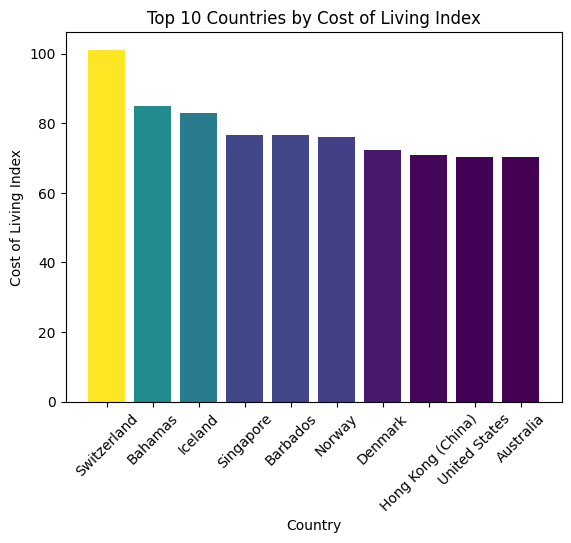

In [56]:
# Define a colormap
cmap = plt.get_cmap('viridis')

# Normalize 
norm = plt.Normalize(min(top_10['Cost of Living Index']), max(top_10['Cost of Living Index']))

# Create the bar chart, color based on 'Cost of Living Index' norm. 
bars = plt.bar(top_10['Country'], top_10['Cost of Living Index'], color = cmap(norm(top_10['Cost of Living Index'])))

# Labels and title
plt.xlabel('Country')
plt.ylabel('Cost of Living Index')
plt.title('Top 10 Countries by Cost of Living Index')
plt.xticks(rotation=45)
plt.show()

In [29]:
# 2: Create a scatterplot to see if there is a correlation between rent and the amount of purchasing power one has
corr = data[['Rent Index', 'Local Purchasing Power Index', 'Rank', 'Country']]
corr

,Rent Index,Local Purchasing Power Index,Rank,Country
0,46.5,158.7,1,Switzerland
1,36.7,54.6,2,Bahamas
2,39.2,120.3,3,Iceland
3,67.2,111.1,4,Singapore
4,19.0,43.5,5,Barbados
...,...,...,...,...
116,2.4,33.1,117,Bangladesh
117,5.6,82.6,118,India
118,3.7,20.0,119,Egypt
119,4.3,42.0,120,Libya


Text(0.5, 1.0, 'Correlation Between Rent and Purchasing Power')

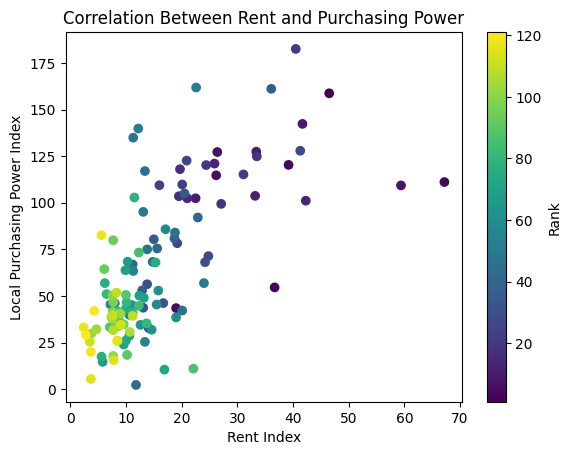

In [47]:
# Matplotlib Scatter Plot
plt.scatter(corr['Rent Index'], corr['Local Purchasing Power Index'], c=corr['Rank'], cmap = 'viridis')
plt.colorbar(label = 'Rank')
plt.xlabel('Rent Index')
plt.ylabel('Local Purchasing Power Index')
plt.title('Correlation Between Rent and Purchasing Power')